# 1) Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2) Read dataset

In [2]:
application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv('previous_application.csv')

# 3) Necessary Check

In [4]:
application_data.info()
application_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


(307511, 122)

In [5]:
application_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
previous_application.shape

(1670214, 37)

In [9]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [15]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# 4) Data cleaning and checking

In [17]:
# Checking random column if there are some missing data or what anottations are used 
application_data['APARTMENTS_AVG']

0         0.0247
1         0.0959
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2021
307507    0.0247
307508    0.1031
307509    0.0124
307510    0.0742
Name: APARTMENTS_AVG, Length: 307511, dtype: float64

In [18]:
# Checking missing values
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [19]:
# Counting top 25 missing values columns
application_data.isna().sum().sort_values(ascending=False).head(25)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_MODE               182590
LANDAREA_AVG                182590
BASEMENTAREA_MEDI           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MODE          169682
dtype: int64

In [20]:
# counting top 60 missing value columns
application_data.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [21]:
# No. of rows and column before dropping
application_data.shape

(307511, 122)

In [22]:
# Drop the columns those have more than 50% missing values
x = len(application_data)/2
x

153755.5

In [23]:
# if a column contains more than50% of its values missing, delete that column

application_data.columns[application_data.isnull().sum() < x]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [24]:
# No. of columns left
len(application_data.columns[application_data.isnull().sum() < x])

81

In [25]:
# NO. of rows and columns left after dropping the columns more than 50 % missing values
application_data = application_data[ application_data.columns[application_data.isnull().sum() < x] ]
application_data.shape


(307511, 81)

In [26]:
application_data.isna().sum().sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
NAME_TYPE_SUITE                   1292
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
dtype: int64

In [28]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [29]:
# Categorical columns

list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START']

In [30]:
# Numerical cols

application_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [31]:
application_data.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 81, dtype: int64

In [32]:
# Finding the percentage of missing data in columns
application_data_missing = application_data.count()/len(application_data)
application_data_missing

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 81, dtype: float64

In [33]:
#finding % of missing data per column
application_data_missing = (1-application_data_missing)*100
application_data_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [35]:
# sorting top % missing value column 
application_data_missing.sort_values(ascending=False).head(25)


FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [47]:
# Checking for particular columns

application_data['FLOORSMAX_AVG'].head()

0    0.083300
1    0.291700
2    0.226282
3    0.226282
4    0.226282
Name: FLOORSMAX_AVG, dtype: float64

In [37]:
application_data['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [38]:
application_data['FLOORSMAX_AVG'].median()

0.1667

In [39]:
application_data['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

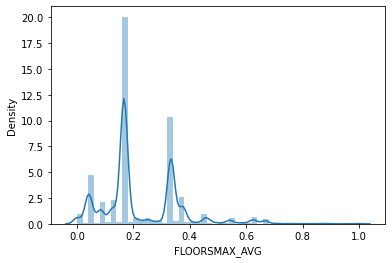

In [40]:
sns.distplot(application_data['FLOORSMAX_AVG'])
plt.show()

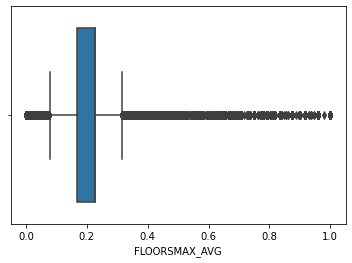

In [65]:
#Checking outliers
sns.boxplot(application_data['FLOORSMAX_AVG'])
plt.show()

In [41]:
#In case of numerical columns, if mean and median are almost the same, it is advised to fill by mean.

#If mean and median are not the same, substitute the missing value by median. 

#outlier mean!=median

In [70]:
application_data['FLOORSMAX_AVG']= application_data['FLOORSMAX_AVG'].fillna(application_data['FLOORSMAX_AVG'].median(),)

In [71]:
application_data['FLOORSMAX_AVG'].isna().sum()

0

In [72]:
application_data_missing.sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [49]:
#checking for different column
application_data['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [54]:
application_data['FLOORSMAX_MODE'].mean()



0.22231504747867964

In [55]:
application_data['FLOORSMAX_MODE'].median()

0.1667

In [57]:
application_data['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

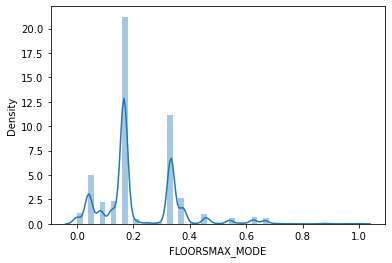

In [58]:
sns.distplot(application_data['FLOORSMAX_MODE'])
plt.show()

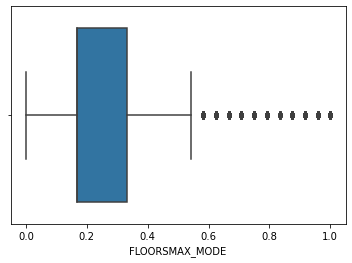

In [64]:
sns.boxplot(application_data['FLOORSMAX_MODE'])
plt.show()

In [59]:
#checking for different column
application_data['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [60]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640694213

In [61]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].median()

0.9816

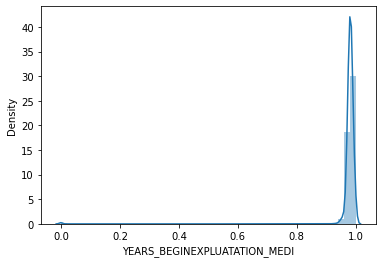

In [62]:
sns.distplot(application_data['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

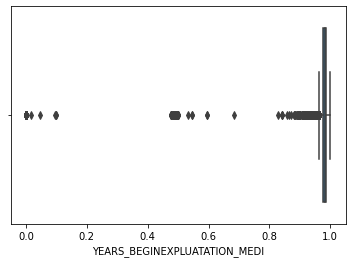

In [63]:
#Checking outliers
sns.boxplot(application_data['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [35]:
#Imputing all the columns having missing value percentage above 30 in the above said manner.

In [135]:
application_data['FLOORSMAX_MODE']= application_data['FLOORSMAX_MODE'].fillna(application_data['FLOORSMAX_MODE'].mean(),)

In [136]:
application_data['YEARS_BEGINEXPLUATATION_MEDI']= application_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean(),)

In [75]:
application_data['FLOORSMAX_MODE'].isna().sum()

0

In [76]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

In [79]:
# checking OCCUPATION_TYPE column

In [80]:
application_data['OCCUPATION_TYPE'].isna().sum()

96391

In [81]:
application_data.shape

(307511, 81)

In [82]:
(96391/307511)*100

31.345545362604916

In [83]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

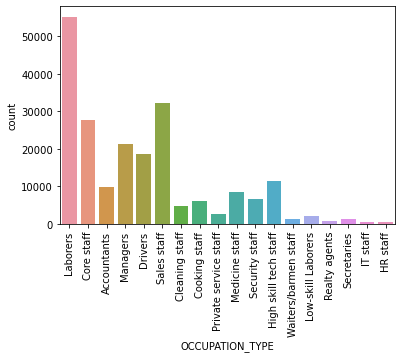

In [84]:
sns.countplot(x= 'OCCUPATION_TYPE', data=application_data)
plt.xticks(rotation=90)
plt.show()

In [85]:
#Treating all the columns having missing value percentage between 10% to 30% in the above said manner and do it as per an apropriate business call which you deem fit.

In [86]:
application_data_missing.sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [87]:
# Checking for different columns

application_data['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

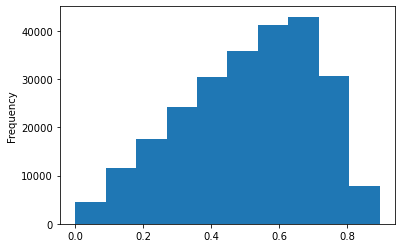

In [88]:
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

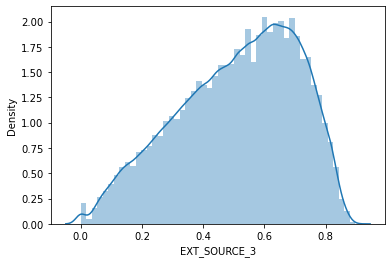

In [89]:
sns.distplot(application_data['EXT_SOURCE_3'])
plt.show()

In [90]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [91]:
application_data['EXT_SOURCE_3'].mean()

0.5108529061800121

In [92]:
application_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [93]:
#THIS HAS SKEWED DISTRIBUTION

In [94]:
# application_train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

application_data['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [95]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [96]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [97]:
len(application_data.AMT_REQ_CREDIT_BUREAU_QRT.unique())

12

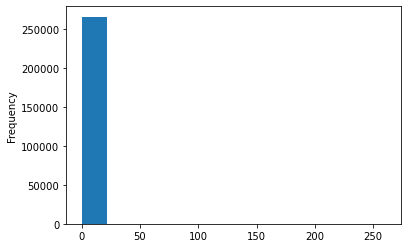

In [98]:
num_unique_values = len(application_data.AMT_REQ_CREDIT_BUREAU_QRT.unique())
application_data.AMT_REQ_CREDIT_BUREAU_QRT.plot.hist(bins=num_unique_values)
plt.show()

In [99]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.mean()

0.26547414959848414

In [100]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [101]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode().iloc[0]

0.0

In [102]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode().iloc[0])

In [103]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

In [104]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.sort_values(ascending=False).head(25)

239474    261.0
253541     19.0
16194       8.0
62052       8.0
289714      8.0
3770        8.0
195971      8.0
257728      8.0
127569      8.0
173866      7.0
197914      7.0
11326       7.0
98055       7.0
42515       7.0
192973      7.0
284145      7.0
15427       6.0
200434      6.0
109994      6.0
185939      6.0
88932       6.0
217431      6.0
63108       6.0
61026       6.0
234894      6.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [105]:
# Categorical columns

list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START']

In [106]:
# Numerical cols

application_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [107]:
cols = list(set(application_data.columns) - set(application_data.describe().columns))
application_data[cols] = application_data[cols].fillna(application_data.mode().iloc[0])

In [108]:
application_data[cols].isna().sum()

NAME_INCOME_TYPE              0
NAME_HOUSING_TYPE             0
NAME_EDUCATION_TYPE           0
OCCUPATION_TYPE               0
EMERGENCYSTATE_MODE           0
CODE_GENDER                   0
NAME_TYPE_SUITE               0
NAME_CONTRACT_TYPE            0
ORGANIZATION_TYPE             0
NAME_FAMILY_STATUS            0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

In [109]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.229631,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.744059,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [110]:
application_data[ application_data.describe().columns].isna().sum().tolist() 

[0,
 0,
 0,
 0,
 0,
 12,
 278,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 660,
 60965,
 150007,
 0,
 150007,
 0,
 0,
 153020,
 148431,
 1021,
 1021,
 1021,
 1021,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 41519,
 41519,
 41519,
 41519,
 0,
 41519]

In [111]:
nulls = application_data.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

In [112]:
application_data['AMT_ANNUITY'].mean()


27108.573909183444

In [113]:
application_data['AMT_ANNUITY'].median()

24903.0

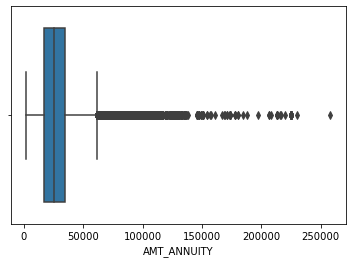

In [114]:
#checking for outlier
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

In [137]:
#Imputing for median as outlier present doing same for all having outliers
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].mean(), inplace=True)

In [138]:
application_data['AMT_GOODS_PRICE'].mean()

538316.2943667056

In [139]:
application_data['AMT_GOODS_PRICE'].mean()

538316.2943667056

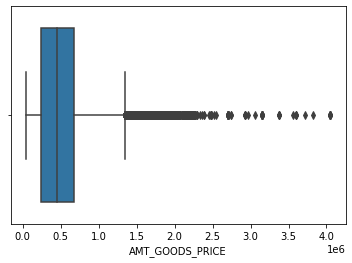

In [118]:
#checking for outlier
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

In [140]:
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].mean(), inplace=True)

In [141]:
application_data['CNT_FAM_MEMBERS'].mean()

2.1526644575316003

In [142]:
application_data['CNT_FAM_MEMBERS'].median()

2.0

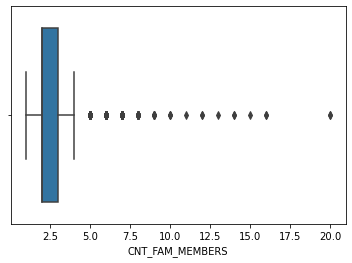

In [143]:
#checking for outlier
sns.boxplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

In [144]:
application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].mean(), inplace=True)

In [145]:
application_data['EXT_SOURCE_2'].mean()

0.5145033543220444

In [146]:
application_data['EXT_SOURCE_2'].median()

0.5659614260608526

In [147]:
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].mean(), inplace=True)    

In [148]:
application_data['EXT_SOURCE_3'].mean()    

0.5156949091812784

In [149]:
application_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [150]:
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].mean(), inplace=True)      

In [151]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].median()  

0.9816

In [152]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].mean() 

0.9796203137444767

In [153]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].fillna(application_data['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)        

In [154]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729428284

In [155]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].fillna(application_data['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)     

In [156]:
application_data['FLOORSMAX_MODE'].mean() 

0.22231504747936223

In [158]:
application_data['FLOORSMAX_MODE'].median() 

0.22231504747867964

In [159]:
application_data['FLOORSMAX_MODE'].fillna(application_data['FLOORSMAX_MODE'].mean(), inplace=True)            

In [160]:
application_data['TOTALAREA_MODE'].mean()     

0.10254666268544003

In [161]:
application_data['FLOORSMAX_MODE'].median() 

0.22231504747867964

In [162]:
application_data['TOTALAREA_MODE'].fillna(application_data['TOTALAREA_MODE'].mean(), inplace=True) 

In [163]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640679882

In [164]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].median()

0.9777522640694213

In [165]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [166]:
application_data['FLOORSMAX_MEDI'].mean()

0.22589659009280993

In [167]:
application_data['FLOORSMAX_MEDI'].median()

0.1667

In [168]:
application_data['FLOORSMAX_MEDI'].fillna(application_data['FLOORSMAX_MEDI'].mean(), inplace=True)

In [169]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [170]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [173]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)

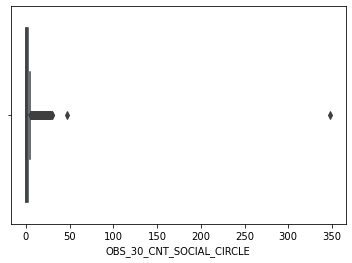

In [174]:
#checking for outlier
sns.boxplot(application_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [175]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791901856

In [176]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [177]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)

In [178]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533851

In [179]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [180]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)

In [181]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788705

In [182]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)

In [183]:
application_data['DAYS_LAST_PHONE_CHANGE'].mean()

-962.8587883320868

In [184]:
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(application_data['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)

In [185]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()

0.006402448193930645

In [186]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)

In [187]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()

0.0070002105326475985

In [188]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)

In [189]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()

0.0343619356973142

In [190]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)

In [191]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].mean()

0.26739526000781977

In [192]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)

In [193]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [194]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)

In [195]:
application_data.isna().sum().sort_values(ascending=False)

SK_ID_CURR                    0
EXT_SOURCE_3                  0
FLAG_DOCUMENT_6               0
FLAG_DOCUMENT_5               0
FLAG_DOCUMENT_4               0
                             ..
FLAG_EMAIL                    0
FLAG_PHONE                    0
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

#### DATA IS CLEAN

In [196]:
#Making Gender more readable
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [197]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
application_data = application_data[application_data['CODE_GENDER']!='XNA']
application_data['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

#### Bining the data

In [198]:
application_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [200]:
#Creating A new categorical variable based on income total
application_data['INCOME_GROUP']=pd.qcut(application_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [201]:
#Binning DAYS_BIRTH
abs(application_data['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])


0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [202]:
#Creating a column AGE using DAYS_BIRTH
application_data['AGE']=abs(application_data['DAYS_BIRTH'])//365.25

In [203]:
application_data['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [204]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
application_data['AGE_GROUP'] = pd.cut(application_data['AGE'],bins=np.arange(20,71,5))

In [206]:
## Adding one more column that will be used for analysis later
application_data['CREDIT_INCOME_RATIO']=round((application_data['AMT_CREDIT']/application_data['AMT_INCOME_TOTAL']))

In [207]:
### Getting the percentage of social circle who defaulted
application_data['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=application_data['DEF_30_CNT_SOCIAL_CIRCLE']/application_data['OBS_30_CNT_SOCIAL_CIRCLE']
application_data['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=application_data['DEF_60_CNT_SOCIAL_CIRCLE']/application_data['OBS_60_CNT_SOCIAL_CIRCLE']

### Checking Imbalance in Target var i.e. TARGET

In [208]:
application_data['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

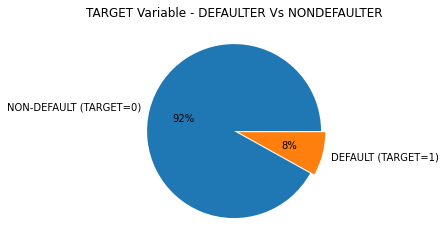

In [209]:
plt.pie(application_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

AS IN THE ABOVE PIE PLOT WE CAN SEE ONLY 8% PEOPLE COMES UNDER DEFAULTER

In [210]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [212]:
application_data_Final=application_data[FinalColumns]

In [213]:
application_data_Final.shape

(307507, 30)

# 5) Analysis

In [214]:
APP0=application_data_Final[application_data_Final.TARGET==0]    # Dataframe with all the data related to non-defaulters
APP1=application_data_Final[application_data_Final.TARGET==1]    # Dataframe with all the data related to defaulters

### Univariate Analysis

In [217]:
# function to count plot for categorical variables
def plotuninewapp(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    
    sns.countplot(x=var, data=APP0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=17)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(APP0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=APP1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=17)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(APP1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

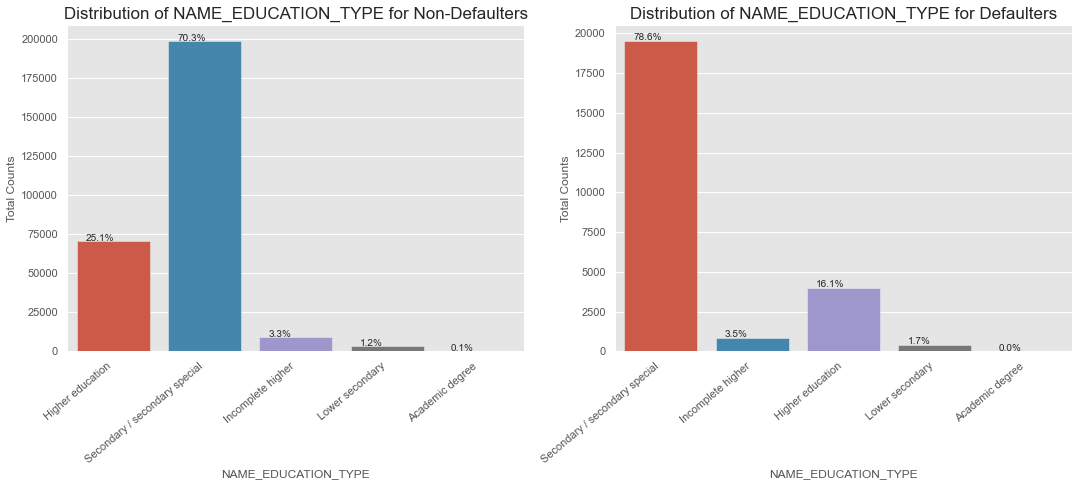

In [255]:
plotuninewapp('NAME_EDUCATION_TYPE')

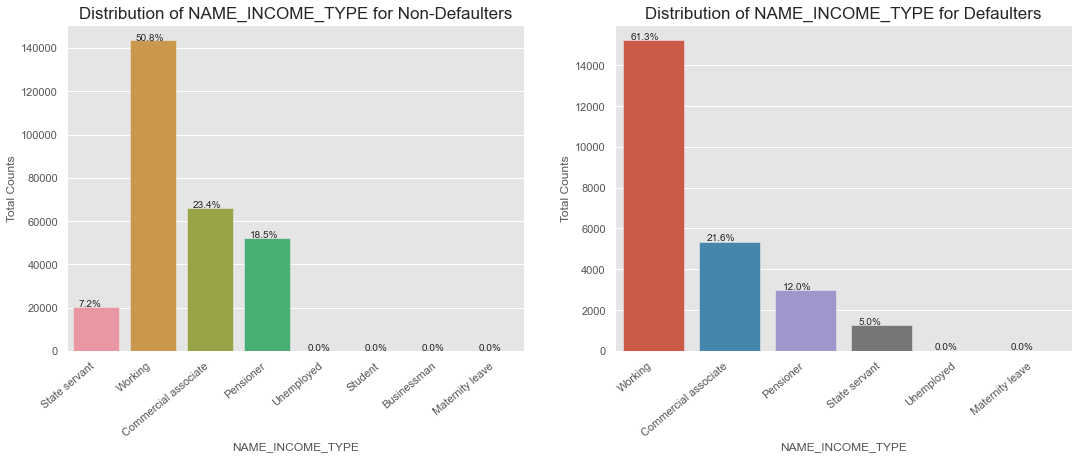

In [256]:
plotuninewapp('NAME_INCOME_TYPE')

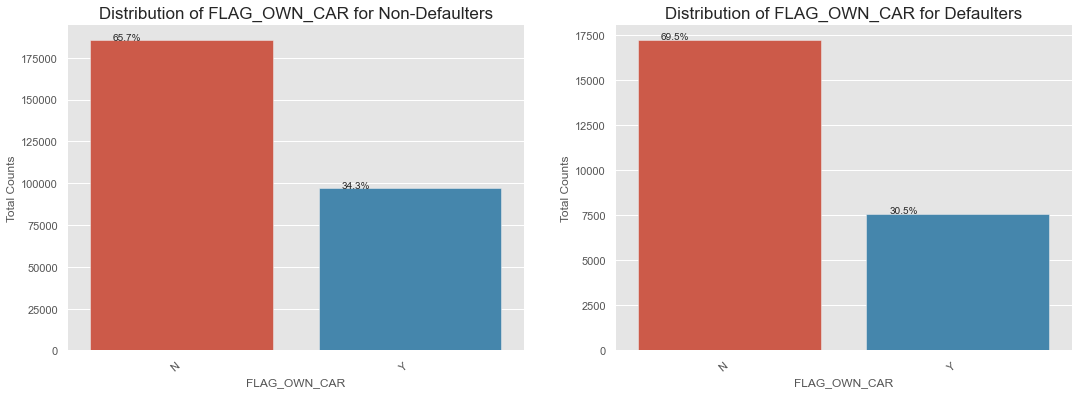

In [257]:
plotuninewapp('FLAG_OWN_CAR')

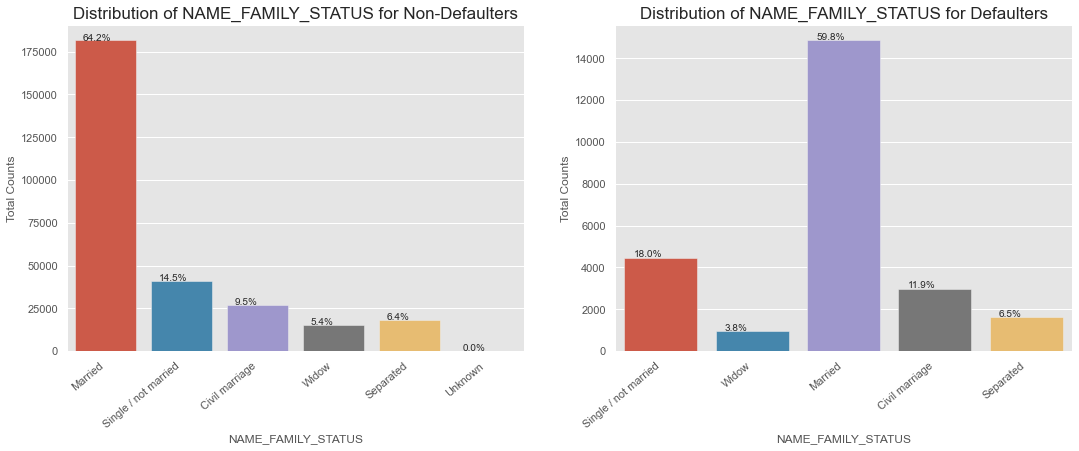

In [258]:
plotuninewapp('NAME_FAMILY_STATUS')

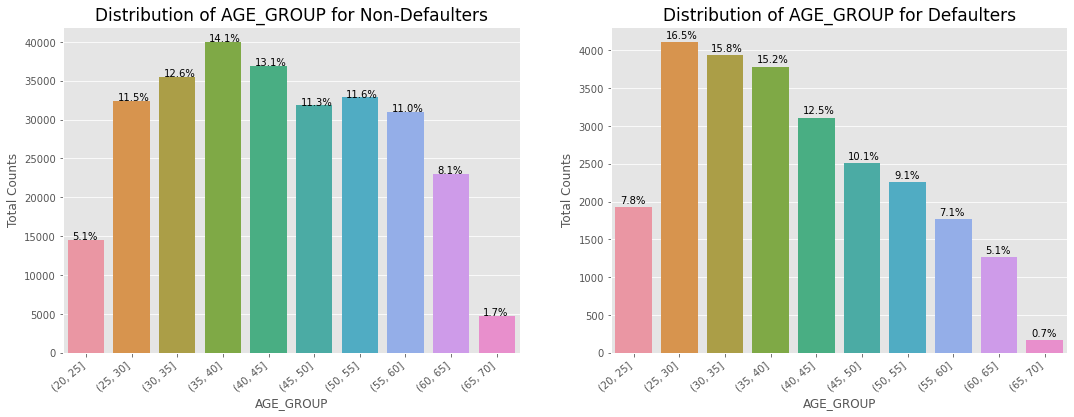

In [224]:
plotuninewapp('AGE_GROUP')

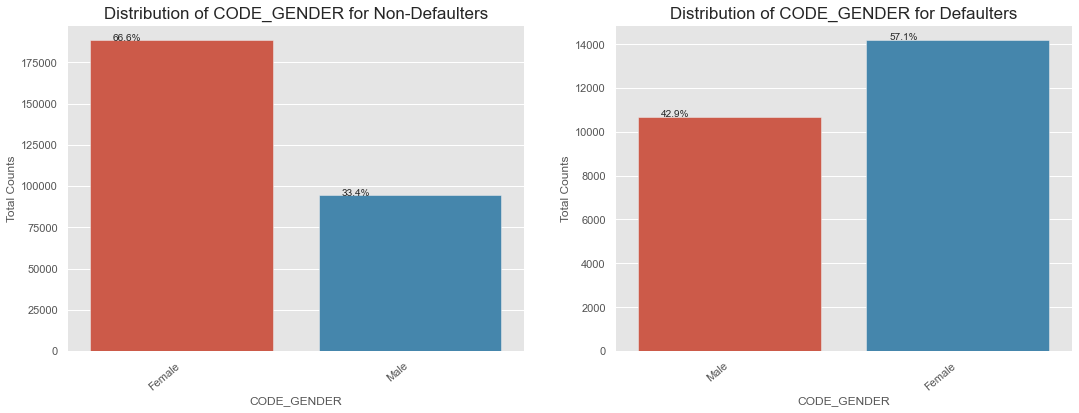

In [259]:
plotuninewapp('CODE_GENDER')

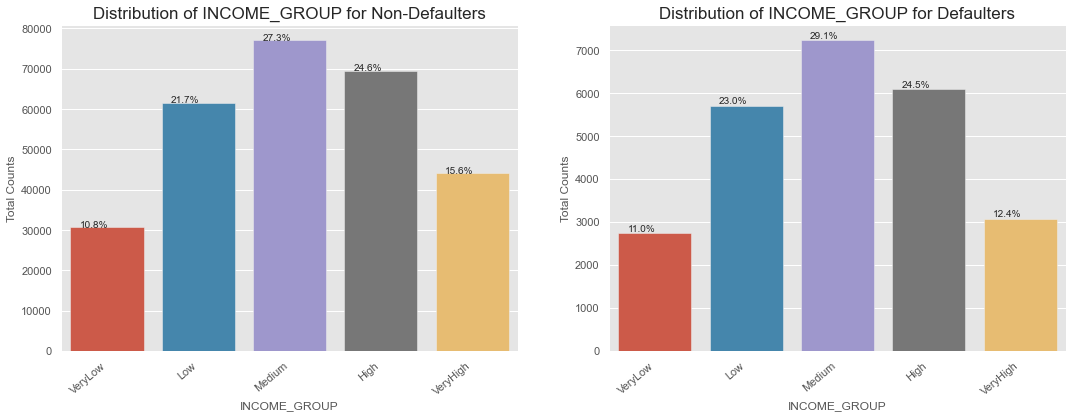

In [260]:
plotuninewapp('INCOME_GROUP')

In [228]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,5))
    
    sns.distplot(a=APP0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=17)
            
    sns.distplot(a=APP1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=17)    
        
    plt.show()

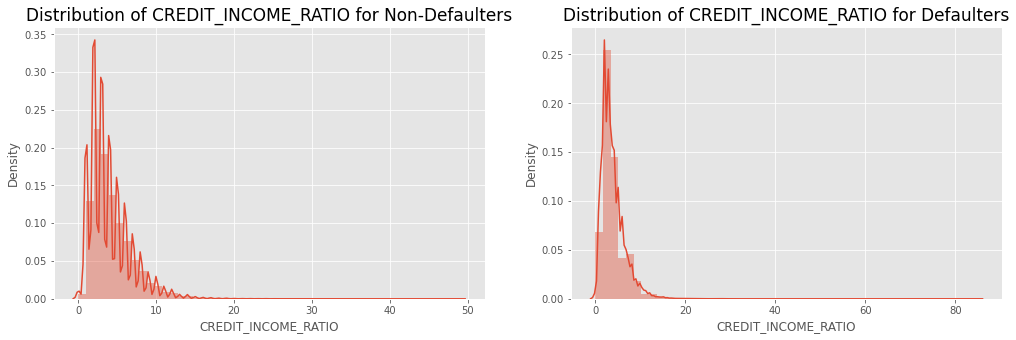

In [229]:
plotunidist('CREDIT_INCOME_RATIO')

In [231]:
APP1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

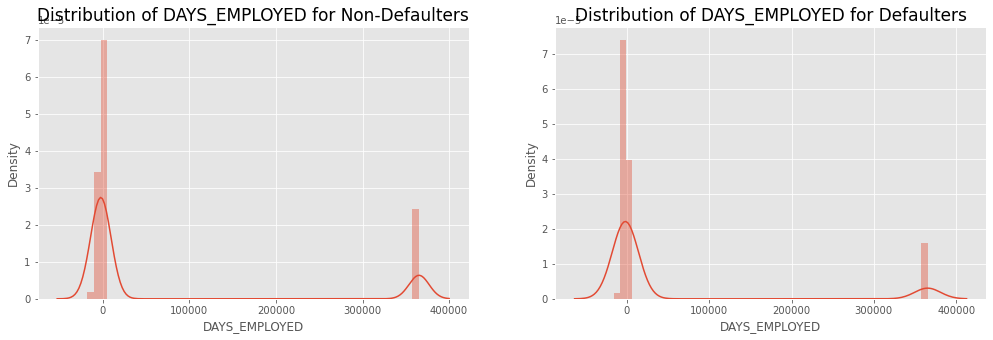

In [232]:
plotunidist('DAYS_EMPLOYED')

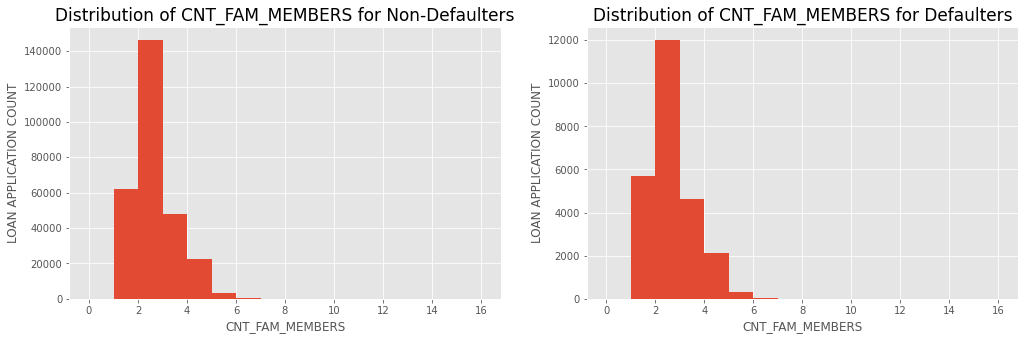

In [233]:
plt.figure(figsize=(17,5))

plt.subplot(1, 2, 1)
APP0['CNT_FAM_MEMBERS'].plot.hist(bins=range(17))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=17)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
APP1['CNT_FAM_MEMBERS'].plot.hist(bins=range(17))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=17)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

### Correlation

In [234]:
#Getting the top 10 correlation in NEWAPP0
corr=APP0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987024,0.987024
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148,0.950148
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.873003,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,0.776421
272,AMT_ANNUITY,AMT_CREDIT,0.771296,0.771296
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589,0.648589
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628732,0.628732
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418949,0.418949
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391498,0.391498
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349425,0.349425


In [235]:
#Getting the top 10 correlation NEWAPP1
corr=APP1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.874562,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
272,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623100,0.623100
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
113,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561


### Bivariate Analysis

In [236]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    
    sns.scatterplot(x=var1, y=var2,data=APP0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=17)
    
    sns.scatterplot(x=var1, y=var2,data=APP1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=17)
            
    plt.show()

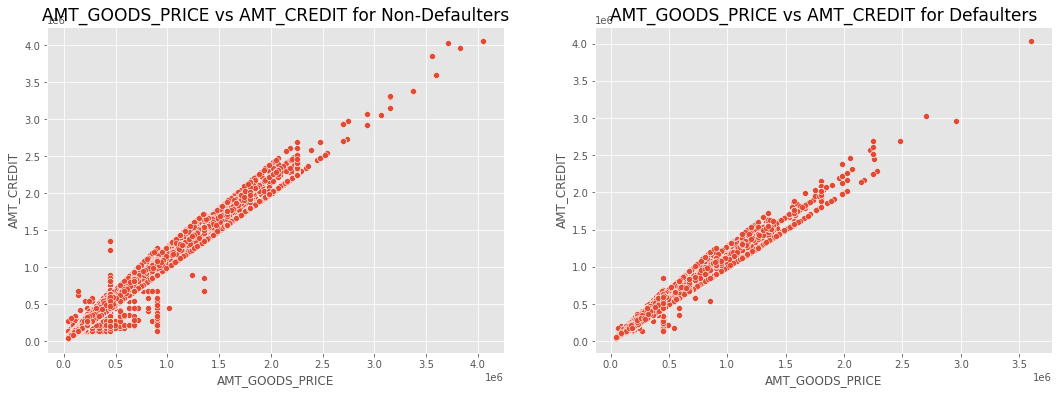

In [237]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')

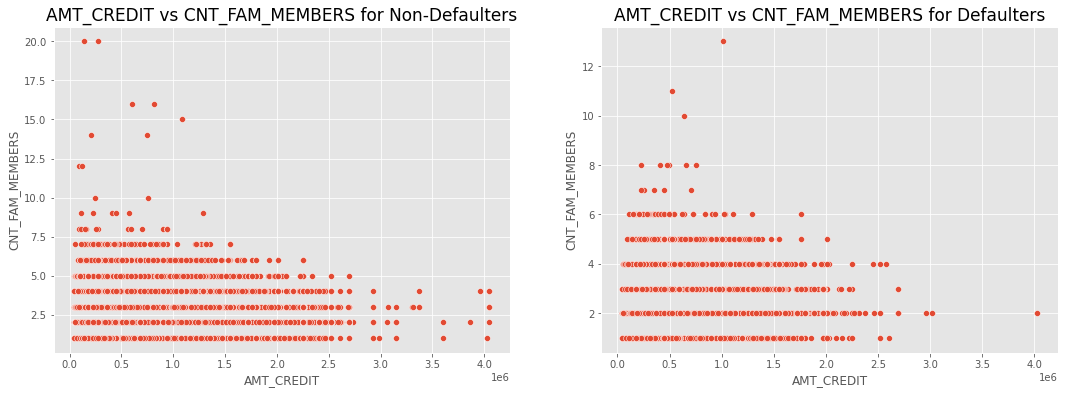

In [238]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')


## For Previous application data 

In [239]:
# cleaning the data
# dropping all the columns with more than 50% of null values
previous_application = previous_application.loc[:,previous_application.isnull().mean()<=0.5]
previous_application.shape

(1670214, 33)

### Univariate

In [240]:
def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(17,5))
    
    sns.countplot(x=var, data=previous_application,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=17)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

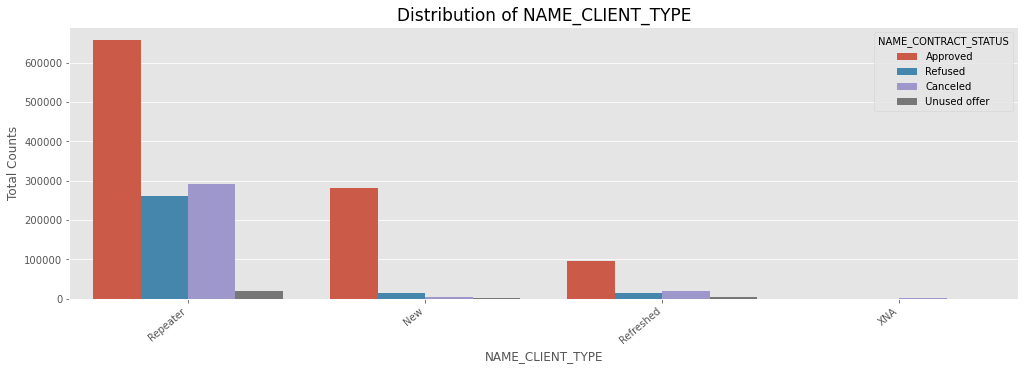

In [241]:
plot_uni('NAME_CLIENT_TYPE')

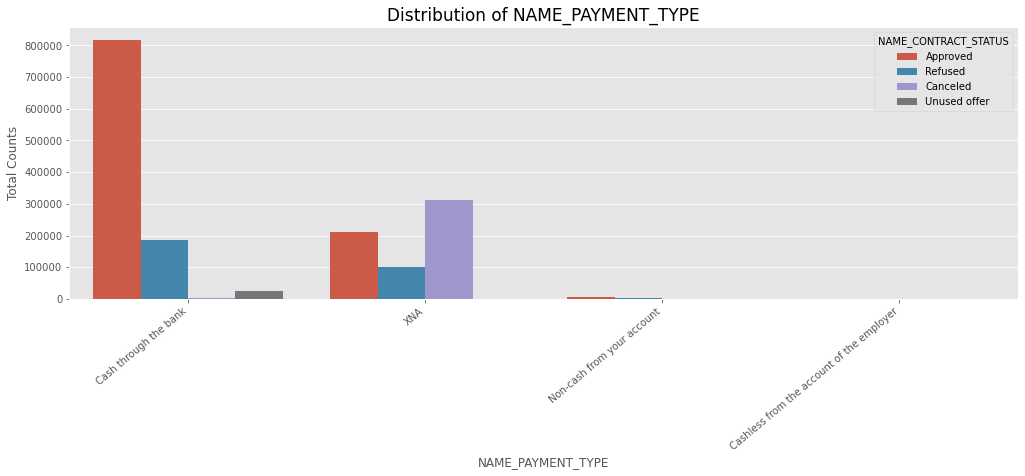

In [242]:
plot_uni('NAME_PAYMENT_TYPE')

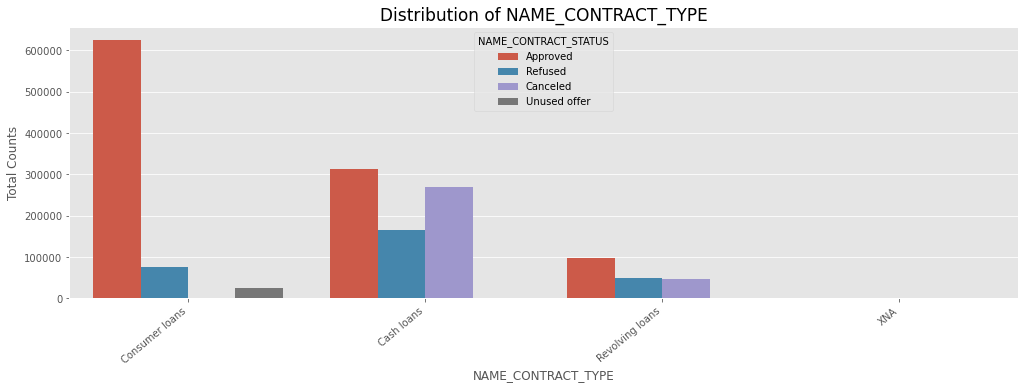

In [243]:
plot_uni('NAME_CONTRACT_TYPE')

### Correlation

In [244]:
#Getting the top 10 correlation for Previous Application Data
corr=previous_application.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### Bivariate

<Figure size 1296x576 with 0 Axes>

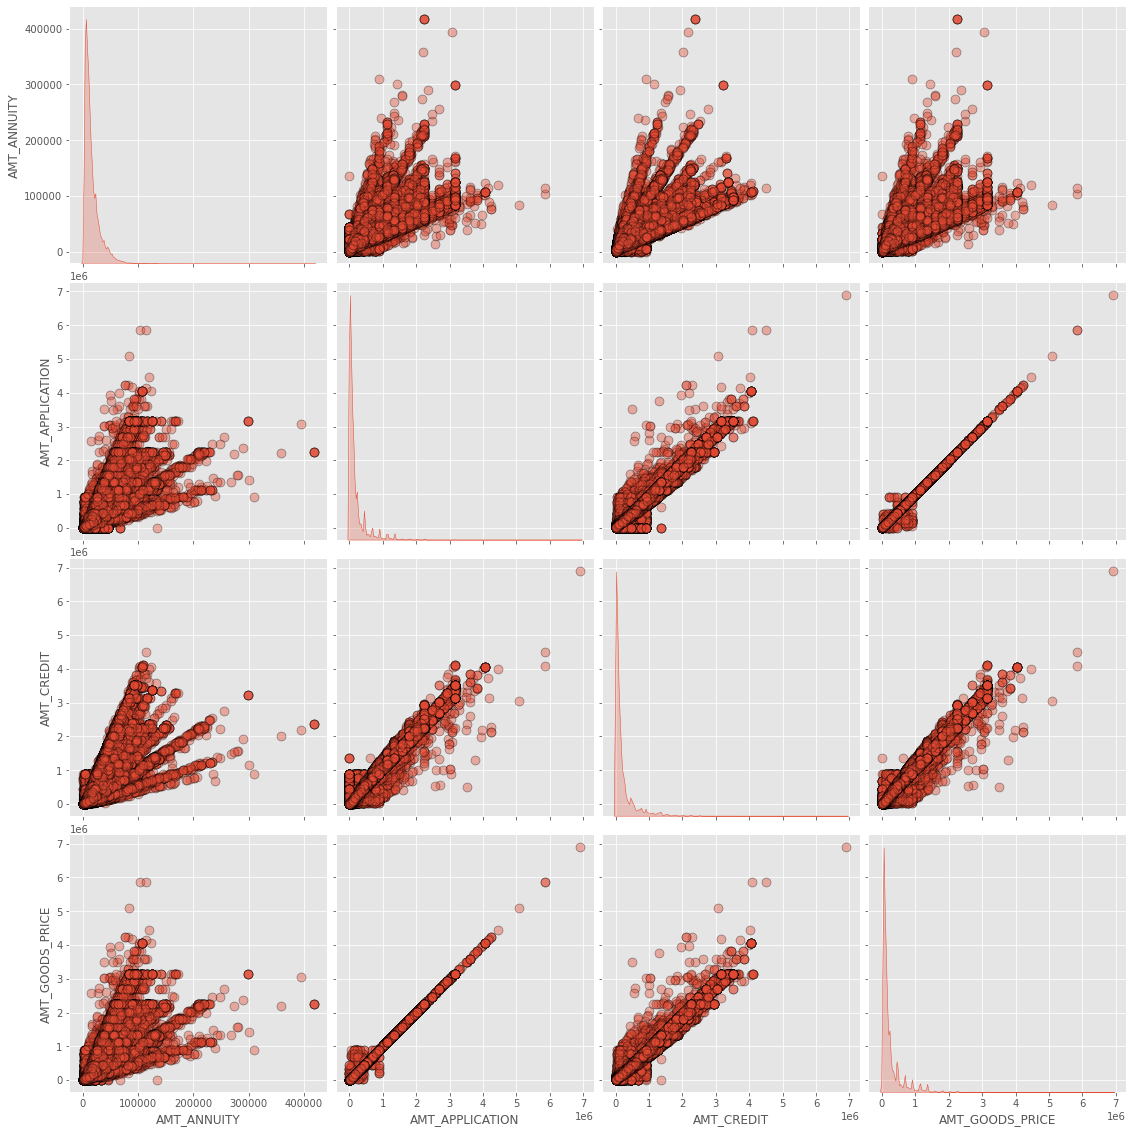

In [246]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[18,8])
sns.pairplot(previous_application[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

## Merging

In [247]:
## Merging the two files to do analysis
newlefprev = pd.merge(application_data_Final, previous_application, how='left', on=['SK_ID_CURR'])

In [249]:
newlefprev.shape

(1430100, 62)

In [250]:
newlefprev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 62 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1430100 non-null  int64   
 1   TARGET                          1430100 non-null  int64   
 2   CODE_GENDER                     1430100 non-null  object  
 3   FLAG_OWN_CAR                    1430100 non-null  object  
 4   FLAG_OWN_REALTY                 1430100 non-null  object  
 5   INCOME_GROUP                    1430100 non-null  category
 6   AGE_GROUP                       1430096 non-null  category
 7   AMT_CREDIT_x                    1430100 non-null  float64 
 8   AMT_INCOME_TOTAL                1430100 non-null  float64 
 9   CREDIT_INCOME_RATIO             1430100 non-null  float64 
 10  NAME_INCOME_TYPE                1430100 non-null  object  
 11  NAME_EDUCATION_TYPE             1430100 non-null  

In [251]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = newlefprev.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(17,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

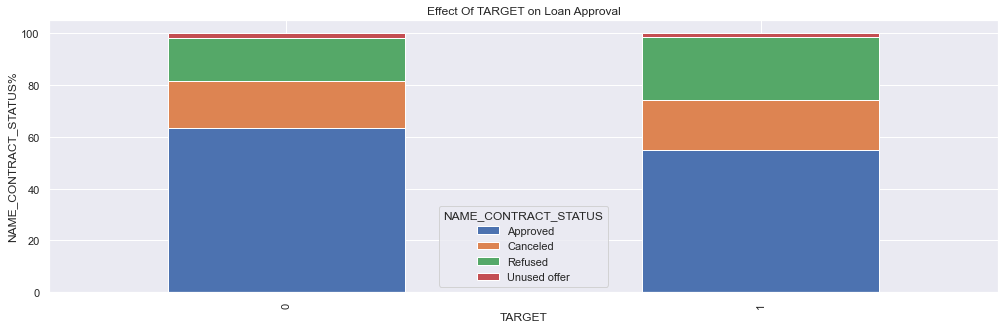

In [252]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')

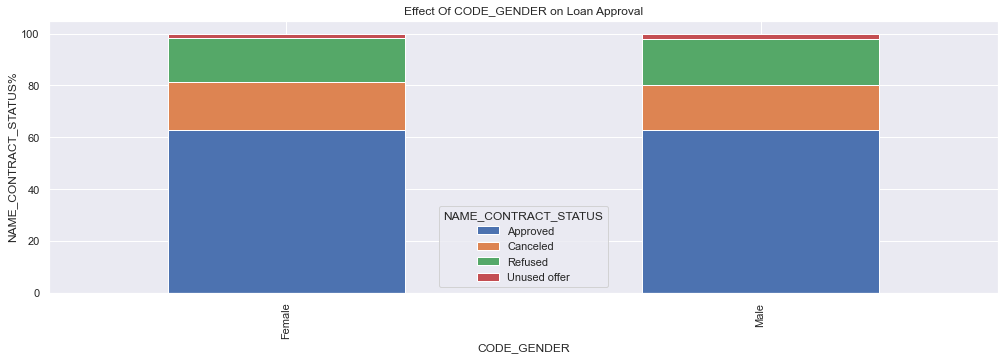

In [253]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

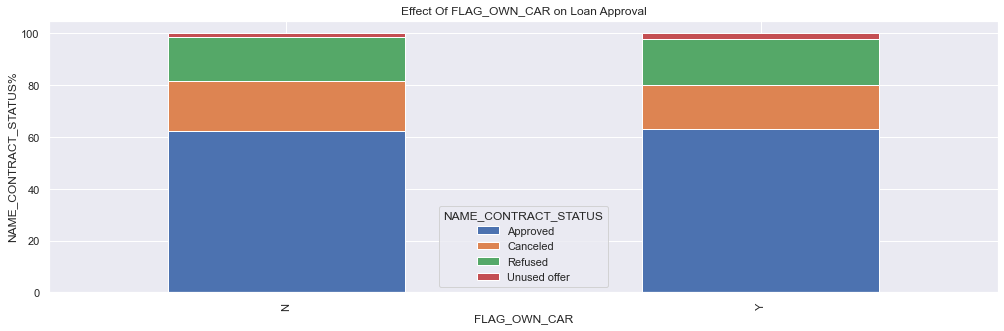

In [254]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')